# AIO Q1 -- Simplified Spiking Neural Networks
In this question we will implement a simplified version of the "biologically-plausible" Leaky-Integrate-and-Fire (LIF) Spiking Neuron and do some simple tasks with it.

## Dependencies and Dataset
Here is some setup and dependencies you'll be using. You may import other libraries if you so choose, though not any that directly implement LIF Neurons.

In [1]:
# Dependencies
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


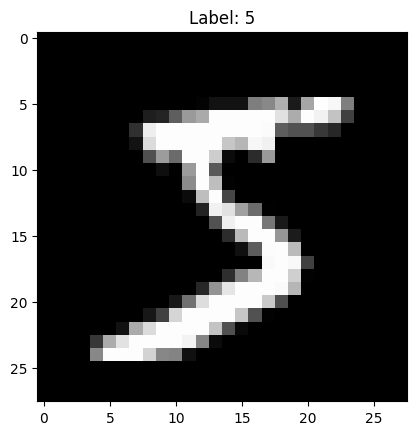

In [ ]:
# Loading MNIST dataset from torchvision.datasets
from torchvision import datasets, transforms

dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

plt.imshow(dataset[0][0].squeeze(), cmap='gray')
plt.title(f"Label: {dataset[0][1]}")
plt.show()
 


## 1 Bernoulli encoding (5): 
In part 1 and 2 we will create code to encode one an input into a timeseries (in particular a spike-train) of ones and zeros.
</br></br>
First, we will encode using samples from the bernoulli distribution. To do this we will treat each pixel, $x_{i,j} \in (0,1)$, as a probability. We will create a new tensor from it with an additional dimension, time. At each time, t, this output $\hat{x}_{i,j,t}$ will be 1 with probability $x_{i,j} * prob\_scale\_factor$ where prob scale factor will be a hyperparameter between 0 and 1, and will be 0 otherwise.That is, the output will be a binary tensor, $\hat{x} \in [0,1]^{28,28,T}$ in the case of MNIST.


In [ ]:
def bernoulli_encoding(x, prob_scale_factor, timesteps=150):
    # Convert input tensor x to Bernoulli encoded tensor
    # You may use torch.bernoulli for this purpose
    # The function should be the same shape as the input tensor x, with an additional dimension for timesteps
    
    pass

In [ ]:
# Test your encoding

## 2 Poisson-Rate Encoding (20)

### 2a Poisson Distribution (10):
Next we will do a rate encoding based off of the Poisson distribution which, given a rate will predict the probability of any number of occurences, k (always an integer), happening. The probability density function of the poisson distribution is given as a function of the rate parameter, $\lambda$, below: 
$$\begin{align*}
P(\hat{x} = k) = \frac{\lambda^k * e^{-\lambda}}{k!}
\end{align*}$$

*Question:* Prove that $E[\hat{x}] = Var[\hat{x}] = \lambda$ :

### 2b Rate Encoding (10)
Using this as a basis, we will convert the values of the input, x, to samples drawn from the poisson distibution over T timesteps, $\hat{x}$, using the pixel values of x as our rate parameter, i.e:
$$\begin{align*}
P(\sum^T_{t=0}\hat{x}_{i,j,t} = k) = \frac{T*x_{i,j}^k * e^{-x_{i,j}}}{k!}
\end{align*}$$
Where k is an integer corresponding to the number of spikes.
</br></br>
We will first produce a 2d Tensor of $k_{i,j} \in (0, T)$ samples, which we will convert to a 3d binary Tensor, $\hat{x}$ where $\sum^T_{t=0}\hat{x}_{i,j,t} = k$ and the ones are evenly spaced along the time dimension. That is there should be a 1 in every other $\frac{k_{i,j}}{T}$ places of $\hat{x}_{i,j,t}$ along the time dimension.

In [ ]:
def rate_encoding(x, scaling_factor, timesteps=150):
    # Convert input tensor x * scaling_factor to Rate encoded tensor -- if k > T for any input pixel, set k = T
    # The function should be the same shape as the input tensor x, with an additional dimension for timesteps
    # You may use torch.poisson
    
    pass

In [ ]:
# Test on MNIST example

## 3. A Simple Spiking Neuron (10)
We will, for the course of this question, consider a simplified version of the Leaky Integrate-and-Fire (LIF) neuron. We will define it like so:
</br></br>
$V_t$ : The internal voltage at time t
</br>
$\tau_t$ : the firing threshold (internal voltage threshold) of the neuron (at time t -- as it increases as the neuron fires)
</br>
$\tau_+$ : the amount the firing threshold increases when the neuron fires.
</br>
$O_t$ : the output, either 0 or 1 at timestep t (whether the neuron fires at that time or not)
</br>
$d$ : The decay rate of the internal voltage
</br></br>
Given some input X, over timesteps, t (0 -> T), the internal voltage, threshold and output will be updated like so:
$$V_t = \begin{cases}
d*V_{t-1} + X_t \quad if & d*V_{t-1} + X_t < \tau \\
0 \quad & otherwise 
\end{cases}
$$
$$\tau_t = \begin{cases}
\tau_{t-1} \quad if & d*V_{t-1} + X_t < \tau \\
\tau_{t-1} + \tau_+ \quad & otherwise 
\end{cases}
$$
$$O_t = \begin{cases}
0 \quad if & d*V_{t-1} + X_t < \tau \\
1 \quad & otherwise 
\end{cases}
$$

In [ ]:
# Implement a Spiking Neuron as described above and test it on a sample input
# You may use whatever library you'd like


## 4. Theoretical Spiking Neuron Power (10):
For the following two parts consider the following task:
</br></br>
Given some input, $X \in [0,1]^n$, return 1 if and only if there are three ones in sequence in X. I.e. [1,1,1,0,0] -> 1 and [1,1,0,1,1] -> 0
</br></br>
a. Prove that a single spiking neuron (as described above) is able to complete this task perfectly. 
</br>
(note: X is able to be given over time and the output may be taken as an OR over all timesteps)
</br></br>
Answer:
</br></br>
b. Prove that this task is not linearly separable (equivelantly there is no single ANN layer + threshold which can represent this). 
</br></br>
Answer:

## 5. Weighted SNN (10)
Next we will add learnable parameters and make a network. This will be based off of they idea of connection strength (thick axon) between real neurons.

We will create an array of 100 of our Spiking Neurons from 3, in addition, we will also include a 784 x 100 weight matrix. Now, instead of directly updating the internal voltages by adding X we will instead add W*X. That is, for neuron n of our model the internal voltage will now be updated like so:
$$V_{n,t} = \begin{cases}
d*V_{n, t-1} + \sum_{i,j} w_{n,i,j} * X_{i,j,t} \quad if & \text{not spiking} \\
0 \quad & otherwise 
\end{cases}
$$
Below, implement this setup in such a way that you can input spike trains into it and produce output spikes. Weight should be initialized to a gaussian with mean = 1, var = 0.1.

In [ ]:
# Implement the weighted SNN as above and test it on a single input from MNIST
# both Bernoulli and Rate encoding should be tested

## 6. Learning Rules (15)
Here we will now implement 2 different learning rules for spiking neurons. Hebbian learning and Spike-Timing Dependent Plasticity (STDP). Both will use the following to determine weight change:
$$\Delta t = t_{out} - t_{in} $$
where $t_{in}$ is the timestep of the most recent input spike and $t_{out}$ is the spike made by the recieving neuron (who's weights we are updating).  

### 6a. Hebbian Learning (5)
Hebbian Learning is named after Neurologist Donald Hebb. His theory is often summarized as "Neurons that fire together, wire together". As such the learning rule will increase weights if this $\Delta t$ is sufficiently small. In particular the weight change will be given as:
$$\Delta W = 
\begin{cases}
dw_+ \quad if & |\Delta t| \leq \tau_{Hebb} \\
dw_- \quad    &  otherwise
\end{cases}$$
Where $dw_+$ is the weight change if the neurons fire together and $dw_-$ is the (generally lower magnitude, sometimes zero) change when the recieving neuron fires too far away from the input neuron. $\tau_{Hebb}$ is the threshold of whether or not the neurons fired together.


In [ ]:
# Implement hebbian learning rule.
def hebbian_update(weights, pre_spikes, post_spikes, w_plus, w_minus, tau_hebb):

    pass

# Plot your hebbian weight updates versus time difference



### 6b. Spike Timing dependent Plasticity (10)
Now we will consider the case where a negative $\Delta t$ is considered opposite the positive case. Further this will also update dependent on the magnitude of $\Delta t$. 
</br>
Particularly the update via STDP will be:
$$\Delta W =
\begin{cases}
A_+ * exp(\frac{\Delta t}{\delta t_{+max}}) \quad & if \quad \Delta t > 0 \\
- A_- * exp(- \frac{\Delta t}{\delta t_{-max}}) \quad & otherwise
\end{cases}$$
Where $A_+$ is the max positive weight change, $A_-$ is the max negative weight change, $\delta t_{+max}$ is the maximum positive time difference, and $\delta t_{-max}$ is the maximum negative time difference

In [ ]:
# Implement STDP and plot Delta t vs Delta W -- There should be a discontinuity at Delta t = 0 

## 7. Model test (10)
Now we will put everything together and see how it works. Note this is unsupervised learning, to measure the accuracy of classification we will have to measure the consistency of the spiking (that is what proportion of the inputs a neuron spiked for from the class it spikes for most frequently).

### 7a. Approximate Accuracy
First, implement the accuracy measuring method described above. It should take as an input a series of spike trains (output trains from each neuron over many inputs) and labels and determine the accuracy.

In [ ]:
# Implement accuracy measurement here -- then test on your untrained model.

### 7b. Training loop
Now we will train our weighted model. Write a training loop and test on 1 epoch of training via STDP. Report the accuracy curve over the course of the epoch at intervals of 500 inputs.

In [ ]:
# Training loop here
# Note, internal voltages should be reset in-between inputs, though voltage thresholds should not.

## 8. Model Improvement (20)
We will now make adjustments to our model to improve the performance

### 8a. Winner-take-all (10)
Winner-take-all models essentially act as a maximization over the output. For our Spiking Neural Network this means that once one neuron spikes no others will be allowed to for that input, we can also soften this to allow all neurons to spike until one neuron spikes m times.
</br></br>
You must also plot your weights such that each neuron's corresponding weights are shown as 28 x 28 blocks of a large 2800 x 2800 image.

In [ ]:
# Implement a winner-take-all single-layer SNN as described above. Report the accuracy curve and plot the weights before and after training one epoch.
# Also plot the weights of your non winner-take-all model before and after training for comparison.

### 8b. Open-ended improvement (10)
Using whatever method you would like to modify your model (particularly hyperparameters), achieve 85% estimated accuracy via unsupervised learning. 